# Лабораторная 2. Упражнение 2. Вариант 22 (=3)
Реализуйте функцию $f(x_1,x_2) = NOT(x_1 \; XOR \; x_2)$. Выполните симуляцию. Получите математическое обоснование результата.

,0,1
0,{'0': 1024},{'1': 1024}
1,{'1': 1024},{'0': 1024}


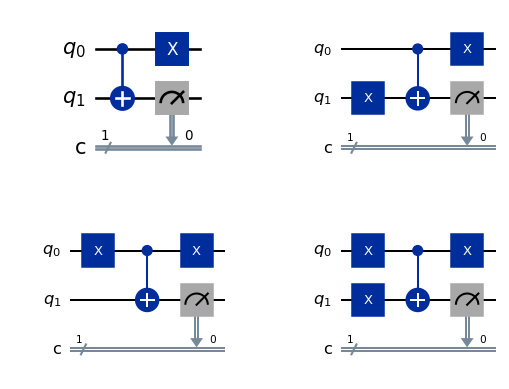

In [20]:
from math import pi
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


simulator = AerSimulator()


def not_xor(ax, x1, x2):
    qc = QuantumCircuit(2, 1)

    if x1: qc.x(0)
    if x2: qc.x(1)

    qc.cx(0, 1)
    qc.x(0)
    qc.measure(1, 0)
    
    qc.draw('mpl', ax=ax)
    
    return simulator.run(qc).result().get_counts(qc)


_, axes = plt.subplots(2, 2)
pd.DataFrame({
    a: {
        b: not_xor(axes[a, b], a, b)
        for b in [0, 1]
    }
    for a in [0, 1]
})